In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
folders = os.listdir('results_indomain')

In [98]:
folders

['SSN_Ind_00',
 'mc_drop01',
 'evidential01',
 'ensemble01',
 'SSN01',
 'SSN_ensemble_mean01',
 'SSN_Ind01',
 'evidential',
 'softmax_ent01',
 'softmax_ent_dice01',
 'SSN_ensemble01',
 '.ipynb_checkpoints',
 'P-Unet01',
 'softmax_ent_xent01']

In [86]:
selected_folders = ['mc_drop01',
                    'ensemble01',
                    'evidential',
                    'P-Unet01',
                    'SSN_Ind_00',
                    'SSN01',
                    #'SSN_ensemble_mean01',
                    #'SSN_Ind01',
                    'SSN_ensemble01',
 
]

In [125]:
pretty_print_folder_names = {
 'SSN_Ind_00':'SSN Ind',
 'mc_drop01': 'MC-Dropout',
 'evidential': 'Evidential',
 'ensemble01': 'Ensemble',
 'SSN01': 'SSN',
 'SSN_ensemble_mean01': 'SSN Ensemble Mean',
 'SSN_Ind01': 'SSN Ind',
 'SSN_ensemble01': 'SSN Ensemble',
 'P-Unet01': 'P-Unet'
}

In [88]:
def find_data_column(model_name, data_column):
    with open(f'results_indomain/{model_name}/text_results.txt', 'r') as file:
        lines = file.readlines()
        found = False
        for line in lines:
            if found == True:
                #print(model_name, line)
                return line
            if data_column in line:
                found = True
        print("not found: ", model_name)

In [89]:
def string_list_to_float(string_list):
    string_list = string_list[1:-2] # remove the closing brackets and the '\n'
    strings = string_list.split(', ')
    return [float(s) for s in strings]

In [90]:
fn_coverage = [string_list_to_float(find_data_column(mn, 'mean coverage of areas missed by mean as tau increases')) for mn in selected_folders]
uq_miss_lesion_size = [string_list_to_float(find_data_column(mn, 'mean size of entirely missed lesions')) for mn in selected_folders]
coverage_of_mean_miss_lesion_size = [string_list_to_float(find_data_column(mn, 'mean coverage of lesions entirely missed by the mean segmentation')) for mn in selected_folders]
prop_lesions_missed = [string_list_to_float(find_data_column(mn, 'proportion of lesions entirely missed')) for mn in selected_folders]

In [91]:
uncertainty_thresholds = np.arange(0, 0.7, 0.01)

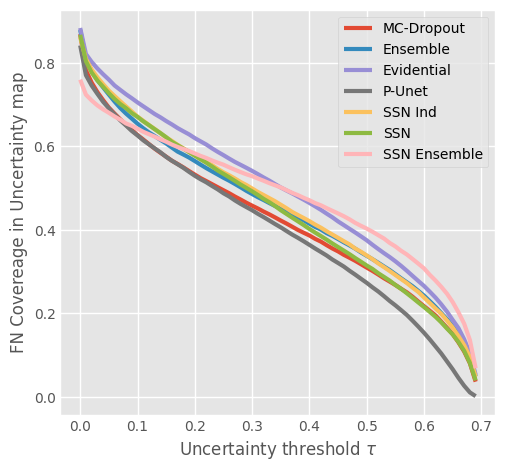

In [126]:
plt.figure(figsize=(5,5))
for i, data in enumerate(fn_coverage):
    plt.plot(uncertainty_thresholds, data, label=pretty_print_folder_names[selected_folders[i]], linewidth=3)
    plt.legend()
    plt.xlabel(r'Uncertainty threshold $\tau$')
    plt.ylabel('FN Covereage in Uncertainty map')
plt.savefig('plots/FN_coverage_umap.pdf', bbox_inches='tight')

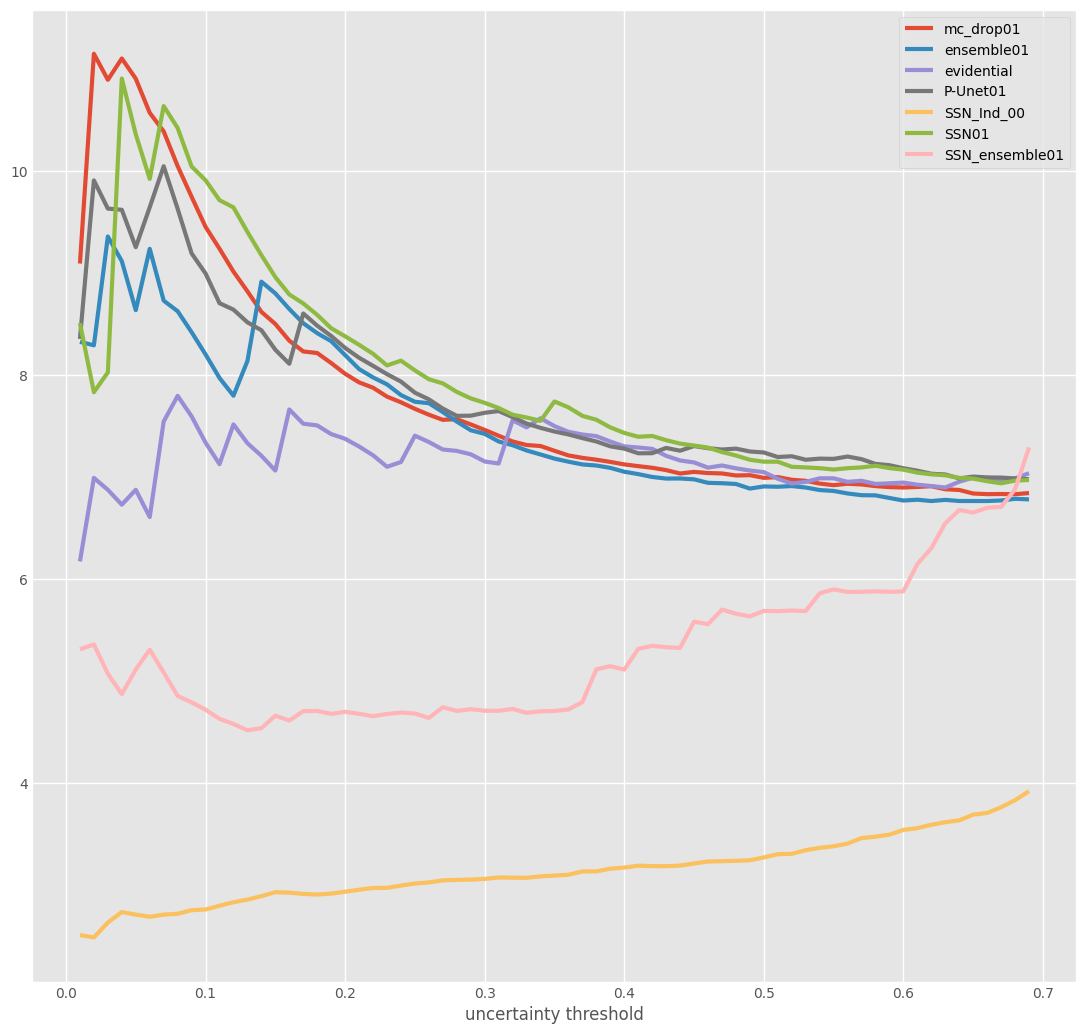

In [93]:
plt.figure(figsize=(12, 12))
for i, data in enumerate(uq_miss_lesion_size):
    plt.plot(uncertainty_thresholds, data, label=selected_folders[i], linewidth=3)
    plt.legend()
    plt.xlabel('uncertainty threshold')

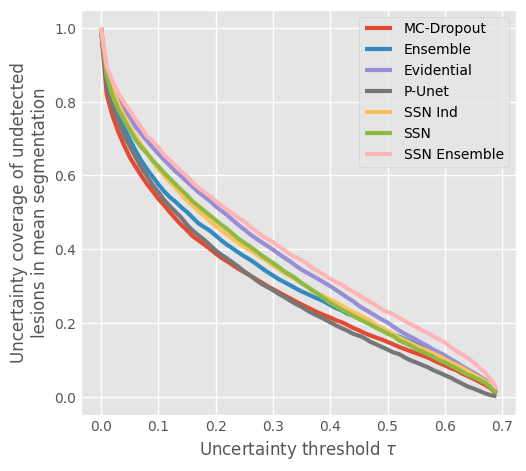

In [127]:
plt.figure(figsize=(5, 5))
for i, data in enumerate(coverage_of_mean_miss_lesion_size):
    plt.plot(uncertainty_thresholds, data, label=pretty_print_folder_names[selected_folders[i]], linewidth=3)
    plt.legend()
    plt.xlabel(r'Uncertainty threshold $\tau$')
    plt.ylabel('Uncertainty coverage of undetected\nlesions in mean segmentation')
plt.savefig('plots/undetected_lesions_coverage.pdf', bbox_inches='tight')

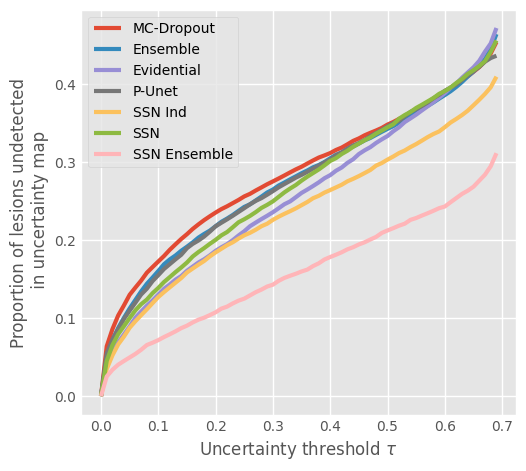

In [128]:
plt.figure(figsize=(5, 5))
for i, data in enumerate(prop_lesions_missed):
    plt.plot(uncertainty_thresholds, data, label=pretty_print_folder_names[selected_folders[i]], linewidth=3)
    plt.legend()
    plt.xlabel(r'Uncertainty threshold $\tau$')
    plt.ylabel('Proportion of lesions undetected\n in uncertainty map')
plt.savefig('plots/prop_lesions_missed_indomain.pdf', bbox_inches='tight')